## Import packages and modules

In [60]:
import os
import json
import csv
import pandas as pd
import io
import sys
from dateutil import parser

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [54]:
pd.options.display.max_rows = 200

In [55]:
os.getcwd()

'/Users/jenniferlee/Documents/Data/Data/raw_filtered'

## Import and save files to dataframes

In [7]:
with open('/Users/jenniferlee/Documents/Data/Data/IRA/russia.csv') as datafile:
    russia_data_df = pd.read_csv(datafile, low_memory = False)
with open('/Users/jenniferlee/Documents/Data/Data/IRA/top50IRAhashtags.csv') as datafile:
    top50hashtags_df = pd.read_csv(datafile, low_memory = False)

In [35]:
with open('/Users/jenniferlee/Documents/Data/Data/IRA/russia_english_sentiments_dates.csv') as datafile:
    russia_filtered_data_df = pd.read_csv(datafile, low_memory = False)

In [118]:
hashtag_50 = {}
listtop50hashtags = top50hashtags_df['hashtag'].tolist()

for hashtag in listtop50hashtags:
    hashtag_50[hashtag[1:].lower()] = {}

In [119]:
for index, row in top50hashtags_df.iterrows():
    print(row['hashtag'][1:] + " & " + str(row['frequency']) + " & ")

news & 128538 & 
sports & 48631 & 
politics & 39732 & 
world & 27554 & 
local & 25889 & 
TopNews & 15149 & 
MAGA & 12142 & 
health & 11479 & 
tcot & 11333 & 
BlackLivesMatter & 11247 & 
business & 10836 & 
PJNET & 10282 & 
tech & 8225 & 
entertainment & 7586 & 
top & 7417 & 
Cleveland & 6678 & 
TopVideo & 6547 & 
crime & 6501 & 
environment & 5785 & 
ISIS & 5741 & 
Merkelmussbleiben & 5390 & 
Trump & 5135 & 
mar & 4865 & 
Miami & 4548 & 
breaking & 4513 & 
topl & 4399 & 
Merkel & 4346 & 
SanJose & 4161 & 
IslamKills & 4112 & 
2A & 3974 & 
life & 3961 & 
WakeUpAmerica & 3944 & 
FAKENEWS! & 3752 & 
GOPDebate & 3693 & 
KochFarms & 3593 & 
DemnDebate & 3578 & 
NowPlaying & 3515 & 
Россия & 3440 & 
TCOT & 3430 & 
ToDoListBeforeChristmas & 3374 & 
ccot & 3310 & 
Chicago & 3258 & 
Syria & 3113 & 
amb & 2914 & 
ThingsYouCantIgnore & 2891 & 
TrumpTrain & 2658 & 
DemDebate & 2652 & 
US & 2613 & 


In [120]:
for hashtag in listtop50hashtags:
    hashtag_50[hashtag[1:].lower()] = {}

In [121]:
for index, row in russia_filtered_data_df.iterrows():
    tweet = str(row['content']).split()
    for word in tweet:
        if word[0] == "#":
            hashtag = word[1:].lower()
            if hashtag_50.get(hashtag) != None:
                #datetime = row['publish_date']
                if hashtag_50[hashtag].get(row['publish_date']) == None:
                    hashtag_50[hashtag][row['publish_date']] = 1
                else:                
                    hashtag_50[hashtag][row['publish_date']] = hashtag_50[hashtag][row['publish_date']] + 1


In [16]:
hashtag_50['maga']

{'2016-10-20 19:45:00': 1,
 '2016-10-20 07:43:00': 1,
 '2016-10-21 13:51:00': 1,
 '2016-10-21 19:54:00': 1,
 '2016-10-26 14:30:00': 1,
 '2016-10-27 20:38:00': 1,
 '2016-10-27 02:33:00': 1,
 '2016-10-29 20:51:00': 1,
 '2016-10-31 03:04:00': 1,
 '2016-11-01 03:09:00': 2,
 '2016-10-24 04:10:00': 1,
 '2016-10-26 04:20:00': 1,
 '2016-10-27 10:21:00': 1,
 '2016-10-29 10:30:00': 1,
 '2016-11-01 22:45:00': 1,
 '2016-11-01 14:02:00': 1,
 '2016-10-20 17:45:00': 1,
 '2016-10-21 01:48:00': 1,
 '2016-10-23 14:18:00': 1,
 '2016-10-25 22:57:00': 1,
 '2016-10-26 15:02:00': 1,
 '2016-10-26 19:04:00': 1,
 '2016-10-26 02:58:00': 1,
 '2016-10-29 15:35:00': 1,
 '2016-10-20 00:05:00': 1,
 '2016-10-20 01:37:00': 1,
 '2016-10-20 22:54:00': 1,
 '2016-10-20 07:42:00': 1,
 '2016-10-23 20:52:00': 2,
 '2016-10-24 01:28:00': 1,
 '2016-10-25 12:27:00': 1,
 '2016-10-25 13:58:00': 1,
 '2016-10-27 11:33:00': 1,
 '2016-10-27 14:35:00': 1,
 '2016-10-29 22:57:00': 1,
 '2016-10-29 09:12:00': 1,
 '2016-10-20 13:39:00': 1,
 

In [133]:
IRAtop50_dict = {}
for index, row in IRAtop50.iterrows():
    IRAtop50_dict[row['hashtag'][1:].lower()] = {}

In [125]:
with open("/Users/jenniferlee/Documents/Data/Data/IRA/top50IRAhashtags.csv") as f:
    IRAtop50 = pd.read_csv(f)

In [134]:
ignore = ['data_cleaning_pset2.ipynb', 'maga_plot.pdf', 'Untitled.ipynb', 'Untitled-checkpoint.ipynb', 'genuine_data_dict.json', 'retweet_analysis-checkpoint.ipynb' , 'retweet_analysis.ipynb', '.DS_Store', '10_22_2.json', 'url_analysis.ipynb', 'url_analysis-checkpoint.ipynb','general_analysis-checkpoint.ipynb', 'genuine_sentiments.csv', 'general_analysis.ipynb', "cleaning-checkpoint.ipynb","sampling.ipynb","hashtag_analysis.ipynb","cleaning.ipynb","sampling-checkpoint.ipynb","hashtag_analysis-checkpoint.ipynb"]
dates_dict = {}
for dirs, subdir, files in os.walk (os.getcwd()):
    for f in files:
        if f not in ignore:
            print(f)
            with open(f) as tweet_file:
                tweets = json.load(tweet_file)
                for tweet in tweets:
                    '''if tweet.get('entities') != None and tweet.get('created_at') != None:
                        if dates_dict.get(tweet['created_at'][:13]) != None:
                            dates_dict[tweet['created_at']]  = dates_dict[tweet['created_at']] + 1
                        else:
                            dates_dict[tweet['created_at']] = 1'''
                    if tweet.get('entities') != None:
                        for hashtag in tweet['entities']['hashtags']:
                            if IRAtop50_dict.get(hashtag['text'].lower()) != None:
                                if IRAtop50_dict[hashtag['text'].lower()].get(tweet['created_at']) != None:
                                    IRAtop50_dict[hashtag['text'].lower()][tweet['created_at']] = IRAtop50_dict[hashtag['text'].lower()][tweet['created_at']] + 1
                                else:
                                    IRAtop50_dict[hashtag['text'].lower()][tweet['created_at']] = 1
                    

sampled10_31_1r.json
sampled10_28_1r.json
sampled10_24_1.json
sampled10_29_1r.json
sampled10_23_2r.json
sampled10_30_1r.json
sampled11_01_2.json
sampled10_25.json
sampled10_27_2.json
sampled10_22_1.json
sampled10_31_2r.json
10_21.json
sampled10_28_2r.json
sampled10_23_1r.json
sampled10_29_2r.json
sampled10_20.json
sampled10_26_1r.json
sampled10_27_1.json
sampled11_01_1.json
sampled10_26_2r.json
sampled10_24_2.json


In [206]:
num_tweets_df = pd.DataFrame.from_dict(dates_dict, orient='index')
num_tweets_df

,0
Mon Oct 31 06:21:18 +0000 2016,1
Mon Oct 31 12:57:43 +0000 2016,1
Mon Oct 31 15:37:20 +0000 2016,1
Mon Oct 31 06:58:45 +0000 2016,1
Tue Nov 01 00:16:25 +0000 2016,1
...,...
Mon Oct 24 22:12:20 +0000 2016,1
Mon Oct 24 21:09:58 +0000 2016,1
Mon Oct 24 15:46:57 +0000 2016,1
Mon Oct 24 23:11:07 +0000 2016,1


In [211]:
num_tweets_df.index = pd.to_datetime(num_tweets_df.index)

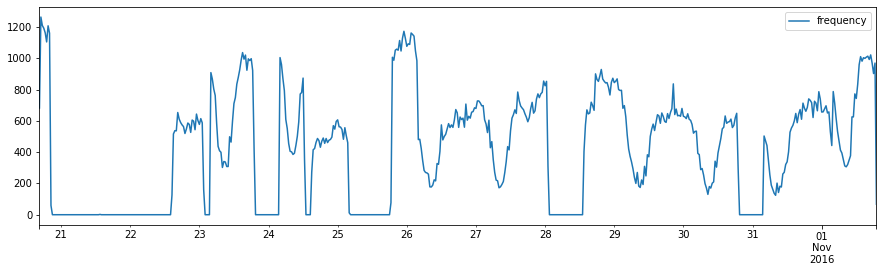

In [216]:
num_tweets_df.resample('30min').sum().plot(figsize=(15,4))

In [192]:
num_tweets_bydate

{'Mon Oct 31': 23857,
 'Tue Nov 01': 36116,
 'Fri Oct 28': 24308,
 'Mon Oct 24': 24868,
 'Sat Oct 29': 32407,
 'Sun Oct 23': 32294,
 'Sun Oct 30': 20914,
 'Wed Oct 26': 36684,
 'Tue Oct 25': 21546,
 'Thu Oct 27': 34128,
 'Sat Oct 22': 12699,
 'Fri Oct 21': 4,
 'Thu Oct 20': 14998}

# 1) a Popular hashtags and usage time stamp
### Comparing popularity against IRA top50(actually choosing the top10 most interesting/distinct)

maga, tcot, PJNET, ISIS, Merkelmussbleiben, trump, IslamKills, 2A, WakeUpAmerica, FAKENEWS!

In [164]:
def compare_popularity(hashtag):
    # load in the counts for the hashtag from the genuine dataset
    genuine_hashtag_df = pd.DataFrame.from_dict(IRAtop50_dict[hashtag], orient='index')
    genuine_hashtag_df.index = pd.to_datetime(genuine_hashtag_df.index)
    genuine_hashtag_df = genuine_hashtag_df.rename(columns={0: "frequency"})
    #print(genuine_hashtag_df.resample('H').sum().head(100))
    
    # load in the counts for the hashtag from the IRA dataset
    IRA_hashtag_df = pd.DataFrame.from_dict(hashtag_50[hashtag], orient='index', columns=['frequency'])
    IRA_hashtag_df.index = pd.to_datetime(IRA_hashtag_df.index)
    IRA_hashtag_df = IRA_hashtag_df.rename(columns={0: "frequency"})
    IRA_hashtag_df = IRA_hashtag_df.tz_localize('EST')
    
    
    # resample both by taking sums by the hour
    genuine_hashtag_df_byhour = genuine_hashtag_df.resample('H').sum()
    IRA_hashtag_df_byhour = IRA_hashtag_df.resample('H').sum()
    
    # creating df for granger causality test
    granger_test_df = IRA_hashtag_df_byhour.join(genuine_hashtag_df_byhour, how='outer', lsuffix='_IRA', rsuffix = '_genuine').dropna()
    
    # Remove comments for plotting!
    
    '''fig, axs = plt.subplots(2, figsize=(15, 8), sharex=True)
    fig.suptitle('Frequency of \'#%s\'' % hashtag, fontsize=14, fontweight='bold', y=1.05)
    fig.tight_layout(pad=3.5)

    # labels and ticks
    plt.ylabel('Use Count', fontsize=12) 
    plt.xlabel('Date', fontsize=12) 
    plt.xlim((pd.Timestamp('2016-10-21'), pd.Timestamp('2016-11-1')))

    axs[0].set_title('IRA troll tweets')
    axs[1].set_title('Genuine troll tweets')
    
    axs[0].plot(granger_test_df.index, granger_test_df['frequency_IRA'])
    axs[1].plot(granger_test_df.index, granger_test_df['frequency_genuine'])
    
    plt.savefig('%s_plot.pdf' % hashtag)'''
    
    # granger causality
    gc_res = grangercausalitytests(granger_test_df, 4)

    print(hashtag + " & " + str(round(gc_res[1][0]['ssr_ftest'][1], 3)) + " & " + str(round(gc_res[2][0]['ssr_ftest'][1], 3)) + " & " + str(round(gc_res[3][0]['ssr_ftest'][1], 3)) + " & " + str(round(gc_res[4][0]['ssr_ftest'][1], 3)) + "\\\\ \hline")           

In [165]:
for hashtag in listtop50hashtags:
    if len(IRAtop50_dict[hashtag[1:].lower()]) < 6 or hashtag[1:].lower() == "crime" or hashtag[1:] =='SanJose':
        continue
    print(hashtag[1:])
    significant_hashtags_list = []
    compare_popularity(hashtag[1:].lower())

news

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1779  , p=0.6735  , df_denom=287, df_num=1
ssr based chi2 test:   chi2=0.1797  , p=0.6716  , df=1
likelihood ratio test: chi2=0.1797  , p=0.6717  , df=1
parameter F test:         F=0.1779  , p=0.6735  , df_denom=287, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3276  , p=0.7209  , df_denom=284, df_num=2
ssr based chi2 test:   chi2=0.6668  , p=0.7165  , df=2
likelihood ratio test: chi2=0.6661  , p=0.7167  , df=2
parameter F test:         F=0.3276  , p=0.7209  , df_denom=284, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2307  , p=0.8750  , df_denom=281, df_num=3
ssr based chi2 test:   chi2=0.7094  , p=0.8710  , df=3
likelihood ratio test: chi2=0.7085  , p=0.8712  , df=3
parameter F test:         F=0.2307  , p=0.8750  , df_denom=281, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2684  , p=0.8


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9803  , p=0.0854  , df_denom=288, df_num=1
ssr based chi2 test:   chi2=3.0113  , p=0.0827  , df=1
likelihood ratio test: chi2=2.9959  , p=0.0835  , df=1
parameter F test:         F=2.9803  , p=0.0854  , df_denom=288, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7113  , p=0.1825  , df_denom=285, df_num=2
ssr based chi2 test:   chi2=3.4827  , p=0.1753  , df=2
likelihood ratio test: chi2=3.4620  , p=0.1771  , df=2
parameter F test:         F=1.7113  , p=0.1825  , df_denom=285, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2979  , p=0.2754  , df_denom=282, df_num=3
ssr based chi2 test:   chi2=3.9903  , p=0.2625  , df=3
likelihood ratio test: chi2=3.9630  , p=0.2655  , df=3
parameter F test:         F=1.2979  , p=0.2754  , df_denom=282, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1647  , p=0.3266  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1725  , p=0.6782  , df_denom=288, df_num=1
ssr based chi2 test:   chi2=0.1743  , p=0.6763  , df=1
likelihood ratio test: chi2=0.1743  , p=0.6763  , df=1
parameter F test:         F=0.1725  , p=0.6782  , df_denom=288, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3130  , p=0.0143  , df_denom=285, df_num=2
ssr based chi2 test:   chi2=8.7773  , p=0.0124  , df=2
likelihood ratio test: chi2=8.6471  , p=0.0133  , df=2
parameter F test:         F=4.3130  , p=0.0143  , df_denom=285, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7430  , p=0.0435  , df_denom=282, df_num=3
ssr based chi2 test:   chi2=8.4332  , p=0.0379  , df=3
likelihood ratio test: chi2=8.3125  , p=0.0400  , df=3
parameter F test:         F=2.7430  , p=0.0435  , df_denom=282, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.7234  , p=0.0298  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1095  , p=0.7410  , df_denom=288, df_num=1
ssr based chi2 test:   chi2=0.1106  , p=0.7394  , df=1
likelihood ratio test: chi2=0.1106  , p=0.7394  , df=1
parameter F test:         F=0.1095  , p=0.7410  , df_denom=288, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0776  , p=0.3418  , df_denom=285, df_num=2
ssr based chi2 test:   chi2=2.1931  , p=0.3340  , df=2
likelihood ratio test: chi2=2.1848  , p=0.3354  , df=2
parameter F test:         F=1.0776  , p=0.3418  , df_denom=285, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7817  , p=0.5050  , df_denom=282, df_num=3
ssr based chi2 test:   chi2=2.4033  , p=0.4930  , df=3
likelihood ratio test: chi2=2.3934  , p=0.4949  , df=3
parameter F test:         F=0.7817  , p=0.5050  , df_denom=282, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7097  , p=0.5859  

In [25]:
# Example of the function
compare_popularity('tcot')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1095  , p=0.7410  , df_denom=288, df_num=1
ssr based chi2 test:   chi2=0.1106  , p=0.7394  , df=1
likelihood ratio test: chi2=0.1106  , p=0.7394  , df=1
parameter F test:         F=0.1095  , p=0.7410  , df_denom=288, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0776  , p=0.3418  , df_denom=285, df_num=2
ssr based chi2 test:   chi2=2.1931  , p=0.3340  , df=2
likelihood ratio test: chi2=2.1848  , p=0.3354  , df=2
parameter F test:         F=1.0776  , p=0.3418  , df_denom=285, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7817  , p=0.5050  , df_denom=282, df_num=3
ssr based chi2 test:   chi2=2.4033  , p=0.4930  , df=3
likelihood ratio test: chi2=2.3934  , p=0.4949  , df=3
parameter F test:         F=0.7817  , p=0.5050  , df_denom=282, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7097  , p=0.5859  

# 1) b Popular hashtags and usage time stamp

### Comparing IRA data set as the predictor time series

In [166]:
genuine_hashtag_frequencies = {}

In [171]:
# getting hashtag FREQUENCIES from the genuine dataset
ignore = ['genuine_data_dict.json', 'maga_plot.pdf', 'Untitled.ipynb', 'data_cleaning_pset2.ipynb', 'Untitled-checkpoint.ipynb', 'retweet_analysis.ipynb', 'retweet_analysis-checkpoint.ipynb', '.DS_Store', '10_22_2.json','url_analysis.ipynb', 'url_analysis-checkpoint.ipynb','general_analysis-checkpoint.ipynb', 'genuine_sentiments.csv', 'general_analysis.ipynb', "cleaning-checkpoint.ipynb","sampling.ipynb","hashtag_analysis.ipynb","cleaning.ipynb","sampling-checkpoint.ipynb","hashtag_analysis-checkpoint.ipynb"]
for dirs, subdir, files in os.walk (os.getcwd()):
    for f in files:
        if f not in ignore:
            print(f)
            with open(f) as tweet_file:
                tweets = json.load(tweet_file)
                for tweet in tweets:
                    if tweet.get('entities') != None:
                        for hashtag in tweet['entities']['hashtags']:
                            if genuine_hashtag_frequencies.get(hashtag['text'].lower()) == None:
                                genuine_hashtag_frequencies[hashtag['text'].lower()] = 1
                            else:
                                genuine_hashtag_frequencies[hashtag['text'].lower()] = genuine_hashtag_frequencies[hashtag['text'].lower()] + 1
                                

sampled10_31_1r.json
sampled10_28_1r.json
sampled10_24_1.json
sampled10_29_1r.json
sampled10_23_2r.json
sampled10_30_1r.json
sampled11_01_2.json
sampled10_25.json
sampled10_27_2.json
sampled10_22_1.json
sampled10_31_2r.json
10_21.json
sampled10_28_2r.json
sampled10_23_1r.json
sampled10_29_2r.json
sampled10_20.json
sampled10_26_1r.json
sampled10_27_1.json
sampled11_01_1.json
sampled10_26_2r.json
sampled10_24_2.json


In [172]:
genuine_hashtag_list_df = pd.DataFrame.from_dict(genuine_hashtag_frequencies, orient='index')
genuine_hashtag_list_df = genuine_hashtag_list_df.rename(columns={0: "frequency"})
genuine_hashtag_list_df = genuine_hashtag_list_df.sort_values(by='frequency', ascending=False)

In [173]:
genuine_hashtagtop50_list_df = genuine_hashtag_list_df.head(50)

In [174]:
test_genuine_top50_dict = {}
for index, row in genuine_hashtagtop50_list_df.iterrows():
    test_genuine_top50_dict[index] = row['frequency']

In [175]:
# formatting for latex
for hashtag in test_genuine_top50_dict.keys():
    print(hashtag + " & " + str(test_genuine_top50_dict[hashtag]) + " & ")

maga & 71193 & 
imwithher & 28660 & 
trumptrain & 26182 & 
trump2016 & 20796 & 
draintheswamp & 20720 & 
crookedhillary & 20323 & 
neverhillary & 16448 & 
trump & 13952 & 
trumppence16 & 13129 & 
nevertrump & 11813 & 
makeamericagreatagain & 11788 & 
lockherup & 9969 & 
votetrump & 9392 & 
hillary & 7965 & 
blacklivesmatter & 7876 & 
hillaryforprison & 7488 & 
tcot & 6621 & 
wikileaks & 5405 & 
americafirst & 5381 & 
hillaryclinton & 5211 & 
maga3x & 4264 & 
gop & 3511 & 
podestaemails & 3384 & 
soundcloud & 3105 & 
ccot & 3044 & 
feelthebern & 2923 & 
strongertogether & 2833 & 
2a & 2652 & 
hillarysemails & 2394 & 
election2016 & 2385 & 
pjnet & 2296 & 
gettysburg & 2271 & 
dumptrump & 2237 & 
wakeupamerica & 2218 & 
debate & 2085 & 
jillnothill & 2063 & 
fbi & 1970 & 
hillaryforprision & 1953 & 
hillarysemail & 1789 & 
podestaemails25 & 1780 & 
vote & 1584 & 
hillaryforprison2016 & 1577 & 
florida & 1559 & 
ohio & 1550 & 
uniteblue & 1547 & 
p2 & 1536 & 
hillary2016 & 1355 & 
debaten

In [176]:
genuine_top50_frequencies = {}
for index, row in genuine_hashtagtop50_list_df.iterrows():
    genuine_top50_frequencies[index.lower()] = {}

In [177]:
# getting the time stamps for the top50 hashtags from the genuine dataset
ignore = ['genuine_data_dict.json', 'maga_plot.pdf', 'Untitled.ipynb', 'data_cleaning_pset2.ipynb', 'Untitled-checkpoint.ipynb', 'retweet_analysis.ipynb', 'retweet_analysis-checkpoint.ipynb', '.DS_Store', '10_22_2.json','url_analysis.ipynb', 'url_analysis-checkpoint.ipynb','general_analysis-checkpoint.ipynb', 'genuine_sentiments.csv', 'general_analysis.ipynb', "cleaning-checkpoint.ipynb","sampling.ipynb","hashtag_analysis.ipynb","cleaning.ipynb","sampling-checkpoint.ipynb","hashtag_analysis-checkpoint.ipynb"]
for dirs, subdir, files in os.walk (os.getcwd()):
    for f in files:
        if f not in ignore:
            print(f)
            with open(f) as tweet_file:
                tweets = json.load(tweet_file)
                for tweet in tweets:
                    if tweet.get('entities') != None:
                        for hashtag in tweet['entities']['hashtags']:
                            if test_genuine_top50_dict.get(hashtag['text'].lower()) != None:
                                if genuine_top50_frequencies[hashtag['text'].lower()].get(tweet['created_at']) != None:
                                    genuine_top50_frequencies[hashtag['text'].lower()][tweet['created_at']] = genuine_top50_frequencies[hashtag['text'].lower()][tweet['created_at']] + 1
                                else:
                                    genuine_top50_frequencies[hashtag['text'].lower()][tweet['created_at']] = 1


                    

sampled10_31_1r.json
sampled10_28_1r.json
sampled10_24_1.json
sampled10_29_1r.json
sampled10_23_2r.json
sampled10_30_1r.json
sampled11_01_2.json
sampled10_25.json
sampled10_27_2.json
sampled10_22_1.json
sampled10_31_2r.json
10_21.json
sampled10_28_2r.json
sampled10_23_1r.json
sampled10_29_2r.json
sampled10_20.json
sampled10_26_1r.json
sampled10_27_1.json
sampled11_01_1.json
sampled10_26_2r.json
sampled10_24_2.json


In [178]:
genuine_top50_frequencies_ofIRA = {}
for index, row in genuine_hashtagtop50_list_df.iterrows():
    genuine_top50_frequencies_ofIRA[index.lower()] = {}

In [179]:
# getting the time stamps for the top50 hashtags from the IRA dataset

for index, row in russia_filtered_data_df.iterrows():
    tweet = str(row['content']).split()
    for word in tweet:
        if word[0] == "#":
            hashtag = word[1:].lower()
            if genuine_top50_frequencies_ofIRA.get(hashtag) != None:
                if genuine_top50_frequencies_ofIRA[hashtag].get(row['publish_date']) == None:
                    genuine_top50_frequencies_ofIRA[hashtag][row['publish_date']] = 1
                else:                
                    genuine_top50_frequencies_ofIRA[hashtag][row['publish_date']] = genuine_top50_frequencies_ofIRA[hashtag][row['publish_date']] + 1
                    

## Comparing with genuine data set as the predictor time series

In [180]:
def compare_popularity2(hashtag):
    # load in the counts for the hashtag from the genuine dataset
    genuine_hashtag_df = pd.DataFrame.from_dict(genuine_top50_frequencies[hashtag], orient='index')
    genuine_hashtag_df.index = pd.to_datetime(genuine_hashtag_df.index)
    genuine_hashtag_df = genuine_hashtag_df.rename(columns={0: "frequency"})
    #print(genuine_hashtag_df.resample('H').sum().head(100))
    
    # load in the counts for the hashtag from the IRA dataset
    IRA_hashtag_df = pd.DataFrame.from_dict(genuine_top50_frequencies_ofIRA[hashtag], orient='index', columns=['frequency'])
    IRA_hashtag_df.index = pd.to_datetime(IRA_hashtag_df.index)
    IRA_hashtag_df = IRA_hashtag_df.rename(columns={0: "frequency"})
    IRA_hashtag_df = IRA_hashtag_df.tz_localize('EST')
    
    # resample both by taking sums by the hour
    genuine_hashtag_df_byhour = genuine_hashtag_df.resample('H').sum()
    IRA_hashtag_df_byhour = IRA_hashtag_df.resample('H').sum()
    
    granger_test_df = genuine_hashtag_df_byhour.join(IRA_hashtag_df_byhour, how='outer', lsuffix='_IRA', rsuffix = '_genuine').dropna()
    
    '''fig, axs = plt.subplots(2, figsize=(15, 8), sharex=True)
    fig.suptitle('Frequency of \'#%s\'' % hashtag, fontsize=14, fontweight='bold', y=1.05)
    fig.tight_layout(pad=3.5)

    # labels and ticks
    plt.ylabel('Use Count', fontsize=12) 
    plt.xlabel('Date', fontsize=12) 
    plt.xlim((pd.Timestamp('2016-10-21'), pd.Timestamp('2016-11-1')))

    axs[0].set_title('IRA troll tweets')
    axs[1].set_title('Genuine troll tweets')
    
    axs[0].plot(granger_test_df.index, granger_test_df['frequency_IRA'])
    axs[1].plot(granger_test_df.index, granger_test_df['frequency_genuine'])

    plt.savefig('%s_plot.pdf' % hashtag)'''
    
    gc_res = grangercausalitytests(granger_test_df, 4)
    
    print(hashtag + " & " + str(round(gc_res[1][0]['ssr_ftest'][1], 3)) + " & " + str(round(gc_res[2][0]['ssr_ftest'][1], 3)) + " & " + str(round(gc_res[3][0]['ssr_ftest'][1], 3)) + " & " + str(round(gc_res[4][0]['ssr_ftest'][1], 3)) + "\\\\ \hline")           
    

maga, imwithher, trumptrain, trump2016, draintheswamp, crookedhillary, neverhillary, trump, trumppence16, nevertrump

In [181]:
compare_popularity2('maga')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2717  , p=0.6026  , df_denom=288, df_num=1
ssr based chi2 test:   chi2=0.2745  , p=0.6003  , df=1
likelihood ratio test: chi2=0.2744  , p=0.6004  , df=1
parameter F test:         F=0.2717  , p=0.6026  , df_denom=288, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2848  , p=0.7524  , df_denom=285, df_num=2
ssr based chi2 test:   chi2=0.5797  , p=0.7484  , df=2
likelihood ratio test: chi2=0.5791  , p=0.7486  , df=2
parameter F test:         F=0.2848  , p=0.7524  , df_denom=285, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4418  , p=0.7233  , df_denom=282, df_num=3
ssr based chi2 test:   chi2=1.3582  , p=0.7154  , df=3
likelihood ratio test: chi2=1.3550  , p=0.7161  , df=3
parameter F test:         F=0.4418  , p=0.7233  , df_denom=282, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3825  , p=0.8211  

In [182]:
for hashtag in test_genuine_top50_dict.keys():
    if len(genuine_top50_frequencies_ofIRA[hashtag.lower()]) < 3:
        continue
    compare_popularity2(hashtag.lower())


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2717  , p=0.6026  , df_denom=288, df_num=1
ssr based chi2 test:   chi2=0.2745  , p=0.6003  , df=1
likelihood ratio test: chi2=0.2744  , p=0.6004  , df=1
parameter F test:         F=0.2717  , p=0.6026  , df_denom=288, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2848  , p=0.7524  , df_denom=285, df_num=2
ssr based chi2 test:   chi2=0.5797  , p=0.7484  , df=2
likelihood ratio test: chi2=0.5791  , p=0.7486  , df=2
parameter F test:         F=0.2848  , p=0.7524  , df_denom=285, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4418  , p=0.7233  , df_denom=282, df_num=3
ssr based chi2 test:   chi2=1.3582  , p=0.7154  , df=3
likelihood ratio test: chi2=1.3550  , p=0.7161  , df=3
parameter F test:         F=0.4418  , p=0.7233  , df_denom=282, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3825  , p=0.8211  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9067  , p=0.3418  , df_denom=288, df_num=1
ssr based chi2 test:   chi2=0.9162  , p=0.3385  , df=1
likelihood ratio test: chi2=0.9147  , p=0.3389  , df=1
parameter F test:         F=0.9067  , p=0.3418  , df_denom=288, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2757  , p=0.7593  , df_denom=285, df_num=2
ssr based chi2 test:   chi2=0.5610  , p=0.7554  , df=2
likelihood ratio test: chi2=0.5604  , p=0.7556  , df=2
parameter F test:         F=0.2757  , p=0.7593  , df_denom=285, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0885  , p=0.9663  , df_denom=282, df_num=3
ssr based chi2 test:   chi2=0.2721  , p=0.9652  , df=3
likelihood ratio test: chi2=0.2720  , p=0.9652  , df=3
parameter F test:         F=0.0885  , p=0.9663  , df_denom=282, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1042  , p=0.9810  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0117  , p=0.9138  , df_denom=288, df_num=1
ssr based chi2 test:   chi2=0.0119  , p=0.9133  , df=1
likelihood ratio test: chi2=0.0119  , p=0.9133  , df=1
parameter F test:         F=0.0117  , p=0.9138  , df_denom=288, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5095  , p=0.6013  , df_denom=285, df_num=2
ssr based chi2 test:   chi2=1.0369  , p=0.5954  , df=2
likelihood ratio test: chi2=1.0350  , p=0.5960  , df=2
parameter F test:         F=0.5095  , p=0.6013  , df_denom=285, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9678  , p=0.4083  , df_denom=282, df_num=3
ssr based chi2 test:   chi2=2.9755  , p=0.3954  , df=3
likelihood ratio test: chi2=2.9602  , p=0.3978  , df=3
parameter F test:         F=0.9678  , p=0.4083  , df_denom=282, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7533  , p=0.5565  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7767  , p=0.1836  , df_denom=283, df_num=1
ssr based chi2 test:   chi2=1.7955  , p=0.1803  , df=1
likelihood ratio test: chi2=1.7899  , p=0.1809  , df=1
parameter F test:         F=1.7767  , p=0.1836  , df_denom=283, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.3435  , p=0.0053  , df_denom=280, df_num=2
ssr based chi2 test:   chi2=10.8779 , p=0.0043  , df=2
likelihood ratio test: chi2=10.6754 , p=0.0048  , df=2
parameter F test:         F=5.3435  , p=0.0053  , df_denom=280, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.0040  , p=0.0021  , df_denom=277, df_num=3
ssr based chi2 test:   chi2=15.3913 , p=0.0015  , df=3
likelihood ratio test: chi2=14.9887 , p=0.0018  , df=3
parameter F test:         F=5.0040  , p=0.0021  , df_denom=277, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.3568  , p=0.0020  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3605  , p=0.1269  , df_denom=127, df_num=1
ssr based chi2 test:   chi2=2.4163  , p=0.1201  , df=1
likelihood ratio test: chi2=2.3941  , p=0.1218  , df=1
parameter F test:         F=2.3605  , p=0.1269  , df_denom=127, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9219  , p=0.0575  , df_denom=124, df_num=2
ssr based chi2 test:   chi2=6.0794  , p=0.0478  , df=2
likelihood ratio test: chi2=5.9405  , p=0.0513  , df=2
parameter F test:         F=2.9219  , p=0.0575  , df_denom=124, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1990  , p=0.0917  , df_denom=121, df_num=3
ssr based chi2 test:   chi2=6.9786  , p=0.0726  , df=3
likelihood ratio test: chi2=6.7950  , p=0.0787  , df=3
parameter F test:         F=2.1990  , p=0.0917  , df_denom=121, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.8548  , p=0.0267  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1117  , p=0.2929  , df_denom=212, df_num=1
ssr based chi2 test:   chi2=1.1274  , p=0.2883  , df=1
likelihood ratio test: chi2=1.1244  , p=0.2890  , df=1
parameter F test:         F=1.1117  , p=0.2929  , df_denom=212, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9636  , p=0.3832  , df_denom=209, df_num=2
ssr based chi2 test:   chi2=1.9733  , p=0.3728  , df=2
likelihood ratio test: chi2=1.9642  , p=0.3745  , df=2
parameter F test:         F=0.9636  , p=0.3832  , df_denom=209, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1621  , p=0.3253  , df_denom=206, df_num=3
ssr based chi2 test:   chi2=3.6047  , p=0.3074  , df=3
likelihood ratio test: chi2=3.5746  , p=0.3112  , df=3
parameter F test:         F=1.1621  , p=0.3253  , df_denom=206, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0507  , p=0.3822  

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0383  , p=0.8450  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=0.0389  , p=0.8437  , df=1
likelihood ratio test: chi2=0.0389  , p=0.8437  , df=1
parameter F test:         F=0.0383  , p=0.8450  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2249  , p=0.7988  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=0.4612  , p=0.7940  , df=2
likelihood ratio test: chi2=0.4607  , p=0.7943  , df=2
parameter F test:         F=0.2249  , p=0.7988  , df_denom=197, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1429  , p=0.9341  , df_denom=194, df_num=3
ssr based chi2 test:   chi2=0.4443  , p=0.9309  , df=3
likelihood ratio test: chi2=0.4438  , p=0.9310  , df=3
parameter F test:         F=0.1429  , p=0.9341  , df_denom=194, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2549  , p=0.9064  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=55.3475 , p=0.0000  , df_denom=182, df_num=1
ssr based chi2 test:   chi2=56.2598 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1209 , p=0.0000  , df=1
parameter F test:         F=55.3475 , p=0.0000  , df_denom=182, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=48.2617 , p=0.0000  , df_denom=179, df_num=2
ssr based chi2 test:   chi2=99.2196 , p=0.0000  , df=2
likelihood ratio test: chi2=79.3568 , p=0.0000  , df=2
parameter F test:         F=48.2617 , p=0.0000  , df_denom=179, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=50.9807 , p=0.0000  , df_denom=176, df_num=3
ssr based chi2 test:   chi2=159.0250, p=0.0000  , df=3
likelihood ratio test: chi2=114.4478, p=0.0000  , df=3
parameter F test:         F=50.9807 , p=0.0000  , df_denom=176, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7858  , p=0.1338  

# Hashtag Uniqueness by Time
### Attempt at different analysis; not in paper

In [31]:
with open('/Users/jenniferlee/Documents/Data/Data/IRA/allIRAhashtags.csv') as datafile:
    allhashtags_df = pd.read_csv(datafile, low_memory = False)

In [32]:
allhashtags_df

,hashtag,frequency
0,#7Things,6
1,#news,128538
2,#politics,39732
3,#RocktheDots,1
4,#SanFrancisco,260
...,...,...
148308,#politiics,1
148309,#revineThis,3
148310,#nashgrier,1
148311,#breakingbad,1


In [39]:
hashtag_all = {}
listtopALLhashtags = allhashtags_df['hashtag'].tolist()

for hashtag in listtopALLhashtags:
    hashtag_all[hashtag[1:].lower()] = {}

In [40]:
len(hashtag_all)

125568

In [43]:
for index, row in russia_filtered_data_df.iterrows():
    tweet = str(row['content']).split()
    for word in tweet:
        if word[0] == "#":
            hashtag = word[1:].lower()
            if hashtag_all.get(hashtag) != None:
                if hashtag_all[hashtag].get(row['publish_date']) == None:
                    hashtag_all[hashtag][row['publish_date']] = 1
                else:                
                    hashtag_all[hashtag][row['publish_date']] = hashtag_all[hashtag][row['publish_date']] + 1

In [42]:
russia_filtered_data_df.shape

(33620, 25)

In [44]:
hashtag_all

{'7things': {},
 'news': {'2016-10-21 22:22:00': 1,
  '2016-10-24 09:47:00': 1,
  '2016-10-28 10:27:00': 1,
  '2016-10-20 00:45:00': 1,
  '2016-10-20 11:47:00': 1,
  '2016-10-20 12:03:00': 1,
  '2016-10-20 12:15:00': 1,
  '2016-10-20 12:25:00': 1,
  '2016-10-20 12:28:00': 1,
  '2016-10-20 12:30:00': 1,
  '2016-10-20 12:33:00': 1,
  '2016-10-20 12:45:00': 1,
  '2016-10-20 12:52:00': 3,
  '2016-10-20 13:04:00': 1,
  '2016-10-20 13:07:00': 1,
  '2016-10-20 13:22:00': 1,
  '2016-10-20 13:34:00': 1,
  '2016-10-20 13:38:00': 1,
  '2016-10-20 13:41:00': 1,
  '2016-10-20 13:45:00': 1,
  '2016-10-20 13:49:00': 1,
  '2016-10-20 13:55:00': 1,
  '2016-10-20 14:08:00': 1,
  '2016-10-20 14:22:00': 1,
  '2016-10-20 15:15:00': 1,
  '2016-10-20 15:49:00': 1,
  '2016-10-20 15:52:00': 1,
  '2016-10-20 16:04:00': 1,
  '2016-10-20 16:26:00': 1,
  '2016-10-20 16:46:00': 1,
  '2016-10-20 16:59:00': 1,
  '2016-10-20 17:00:00': 1,
  '2016-10-20 17:15:00': 2,
  '2016-10-20 17:20:00': 1,
  '2016-10-20 17:33:00':

In [48]:
for hashtag in hashtag_all.keys():
    if len(hashtag_all[hashtag]) < 6 and len(hashtag_all[hashtag]) > 0:
        print(str(hashtag) + ": " + str(hashtag_all[hashtag]))

sanfrancisco: {'2016-10-31 21:36:00': 1, '2016-10-28 05:55:00': 1}
california: {'2016-10-24 18:56:00': 1, '2016-10-26 08:40:00': 1, '2016-10-23 05:11:00': 1}
repealthe19th: {'2016-10-25 08:03:00': 1}
hauntedpickuplines: {'2016-10-28 21:43:00': 1, '2016-10-28 21:42:00': 1, '2016-10-29 02:30:00': 1}
hurricanematthew: {'2016-10-28 20:19:00': 1, '2016-10-30 23:24:00': 2, '2016-10-20 00:02:00': 1}
oakland: {'2016-10-21 03:43:00': 1, '2016-10-21 03:58:00': 1, '2016-10-27 01:11:00': 1, '2016-10-22 12:33:00': 1}
sf: {'2016-10-23 20:37:00': 1, '2016-10-31 19:56:00': 1, '2016-10-22 07:43:00': 1}
trump's: {'2016-10-22 01:55:00': 1}
minneapolis: {'2016-10-20 23:47:00': 1, '2016-11-01 10:33:00': 1}
spotify: {'2016-11-01 18:30:00': 1}
oscarssowhite: {'2016-10-27 19:49:00': 1}
13: {'2016-10-31 19:36:00': 1}
nfl: {'2016-10-30 02:57:00': 1, '2016-10-22 19:57:00': 1, '2016-10-26 09:11:00': 1, '2016-10-26 09:19:00': 1}
brussels: {'2016-10-29 00:36:00': 1, '2016-10-29 00:41:00': 1, '2016-10-29 01:03:00': 

farrakhantwitterarmy:: {'2016-10-29 21:16:00': 1}
tntweeters: {'2016-10-30 11:18:00': 1}
respectmothers: {'2016-10-30 22:30:00': 1}
respectfathers: {'2016-10-30 22:30:00': 1}
respectfamily: {'2016-10-30 22:30:00': 1}
trinity: {'2016-10-30 22:31:00': 1}
comeyresign: {'2016-10-30 05:15:00': 1}
environmentalracism: {'2016-10-31 11:50:00': 2}
nodapl->: {'2016-10-31 11:50:00': 1}
solidarity✊�: {'2016-10-31 11:50:00': 1}
wechargegenocide: {'2016-10-31 11:50:00': 1}
bluewave2016: {'2016-10-31 13:51:00': 1}
phase3: {'2016-10-31 13:51:00': 1}
allblacklivesmatter: {'2016-10-31 03:45:00': 1}
nositec: {'2016-10-31 09:49:00': 2}
nolng: {'2016-10-31 09:49:00': 2}
glbt: {'2016-10-24 21:40:00': 1, '2016-10-25 14:54:00': 1, '2016-10-25 14:48:00': 1, '2016-10-25 22:55:00': 1}
dayofthedead: {'2016-11-01 18:04:00': 2}
splcaddmetoo: {'2016-11-01 01:56:00': 1}
donaldtrump': {'2016-11-01 22:07:00': 1}
fcbpsg: {'2016-11-01 22:07:00': 1}
terribletrump: {'2016-11-01 22:07:00': 1}
deathbycop: {'2016-11-01 03:57:

wisen: {'2016-10-29 20:52:00': 1, '2016-10-27 21:59:00': 1}
secretaryofstate: {'2016-10-29 15:34:00': 1}
goldmansachs: {'2016-10-24 00:18:00': 1}
disgrace: {'2016-10-29 15:27:00': 1}
yuppie: {'2016-10-30 06:44:00': 1}
internetmarketing: {'2016-10-21 06:51:00': 1, '2016-10-30 22:38:00': 1}
billboard: {'2016-10-29 17:11:00': 1}
kitchen: {'2016-10-29 12:30:00': 1}
web: {'2016-10-22 08:06:00': 1}
�: {'2016-10-25 01:07:00': 1}
portraits: {'2016-10-28 15:18:00': 1}
snapcode: {'2016-10-26 19:36:00': 1}
superman: {'2016-10-26 23:14:00': 1}
ebook: {'2016-11-01 03:50:00': 1}
kickstarter: {'2016-10-29 02:30:00': 1, '2016-10-27 19:46:00': 1}
sp: {'2016-10-31 21:27:00': 1, '2016-11-01 03:32:00': 1}
hhbu: {'2016-10-25 08:51:00': 1}
shortfilm: {'2016-10-25 14:55:00': 1, '2016-10-25 14:51:00': 1}
twitch: {'2016-10-28 00:52:00': 1}
website: {'2016-10-28 17:37:00': 1}
afghan: {'2016-10-23 23:04:00': 1, '2016-10-24 04:03:00': 1, '2016-10-24 04:35:00': 1}
france’s: {'2016-10-23 03:04:00': 1, '2016-10-23 0

krsone: {'2016-10-22 21:32:00': 1, '2016-10-29 03:42:00': 1}
letswork: {'2016-10-21 05:00:00': 1}
blokclubtv.com: {'2016-10-20 08:35:00': 1}
facebookads: {'2016-10-26 07:04:00': 1}
tl: {'2016-10-31 01:03:00': 1}
nerdsoul: {'2016-10-23 02:02:00': 1}
johnpodesta: {'2016-10-31 01:19:00': 1, '2016-10-31 00:56:00': 1}
bbbd50: {'2016-10-25 21:41:00': 1}
samoramachel: {'2016-10-20 13:13:00': 1}
lukecake: {'2016-10-21 11:53:00': 1}
huhomecoming16:: {'2016-10-21 19:25:00': 1}
fashionfriday!: {'2016-10-21 21:56:00': 1}
redcarpetkerry: {'2016-10-21 21:56:00': 1}
loveyafuckinself2k17.: {'2016-10-21 06:51:00': 1}
wonderwoman75: {'2016-10-22 00:27:00': 1}
joshbrown: {'2016-10-22 13:02:00': 1, '2016-10-21 10:23:00': 1}
sukkot: {'2016-10-22 15:33:00': 1}
missusa2016: {'2016-10-22 15:33:00': 1}
unc: {'2016-10-22 20:35:00': 1}
blackjeopardy: {'2016-10-23 04:08:00': 1}
angiehookmeup: {'2016-10-26 00:11:00': 1}
techinclusion16: {'2016-10-26 07:45:00': 1}
hailhydra: {'2016-10-28 02:34:00': 1}
turnout: {'20

hama/south: {'2016-10-30 08:40:00': 1}
iraqiarmy: {'2016-10-22 22:52:00': 1}
newscoverup: {'2016-10-29 20:34:00': 1}
fedoremelianenko: {'2016-10-31 02:23:00': 1}
mattmitrione: {'2016-10-31 02:23:00': 1}
stongest: {'2016-10-22 16:08:00': 1}
besuccessful.”: {'2016-10-24 16:16:00': 1}
tgim: {'2016-10-24 16:16:00': 1}
vote.: {'2016-10-24 04:14:00': 1}
maga#trump#altright: {'2016-10-29 22:44:00': 1}
nastywomenvote: {'2016-10-29 04:41:00': 1}
weinergate2: {'2016-10-30 10:47:00': 1}
findcorrie: {'2016-11-01 13:40:00': 1}
blackknowledgetime: {'2016-10-22 01:17:00': 1}
kslef: {'2016-10-21 01:05:00': 1}
health#spon: {'2016-10-22 05:13:00': 1}
chemun: {'2016-10-23 16:23:00': 2}
blackpanther50: {'2016-10-21 23:11:00': 1}
charlotteuprising:: {'2016-10-20 19:20:00': 1}
th7: {'2016-10-22 09:20:00': 1}
codenewbie: {'2016-10-25 19:22:00': 1}
apollonews:: {'2016-10-27 21:28:00': 1}
tweetsfromthetub: {'2016-10-27 04:45:00': 1, '2016-10-27 04:54:00': 1}
orkingram: {'2016-10-28 15:42:00': 1}
stacydrew: {'2

In [68]:
unique_dict = {}
for hashtag in hashtag_all.keys():
    if len(hashtag_all[hashtag]) < 6 and len(hashtag_all[hashtag]) > 0:
        for date in hashtag_all[hashtag].keys():
            date = parser.parse(date)
            if unique_dict.get(date) != None:
                unique_dict[date] = unique_dict[date]+1
            else:
                unique_dict[date] = 1

In [71]:
unique_hashtags = pd.DataFrame.from_dict(unique_dict, orient='index')

In [72]:
unique_hashtags.head()

,0
2016-10-31 21:36:00,4
2016-10-28 05:55:00,4
2016-10-24 18:56:00,3
2016-10-26 08:40:00,8
2016-10-23 05:11:00,13


In [80]:
unique_hashtags = unique_hashtags.rename(columns={0: "frequency"})

In [81]:
unique_hashtags['frequency']

2016-10-31 21:36:00     4
2016-10-28 05:55:00     4
2016-10-24 18:56:00     3
2016-10-26 08:40:00     8
2016-10-23 05:11:00    13
                       ..
2016-10-21 04:59:00     1
2016-10-22 01:08:00     1
2016-10-23 01:14:00     1
2016-10-26 17:56:00     2
2016-10-27 22:07:00     1
Name: frequency, Length: 3371, dtype: int64

In [112]:
times = pd.DatetimeIndex(unique_hashtags.index)
grouped = unique_hashtags.resample('H').sum()

In [113]:
grouped

,frequency
2016-10-20 00:00:00,22
2016-10-20 01:00:00,18
2016-10-20 02:00:00,18
2016-10-20 03:00:00,17
2016-10-20 04:00:00,24
...,...
2016-11-01 19:00:00,24
2016-11-01 20:00:00,14
2016-11-01 21:00:00,29
2016-11-01 22:00:00,32


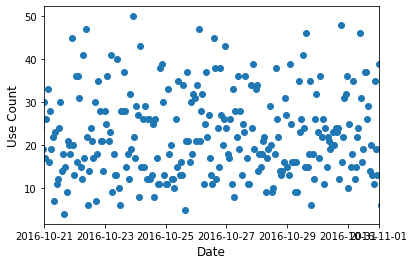

In [114]:
fig = plt.figure()
plt.ylabel('Use Count', fontsize=12) 
plt.xlabel('Date', fontsize=12) 
plt.xlim((parser.parse('2016-10-21'), parser.parse('2016-11-1')))
plt.scatter(grouped.index, grouped['frequency'])